### Data Pre-Processing

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In [5]:
print(df_matches.columns)
print(df_deliveries.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [6]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [7]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [8]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [9]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [10]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [11]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [12]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket

In [13]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [28]:
df_total = pd.merge(df_matches, df_deliveries, left_on='id',right_on='match_id', how='outer')

### Q1) Who will today match DC VS KXIP?

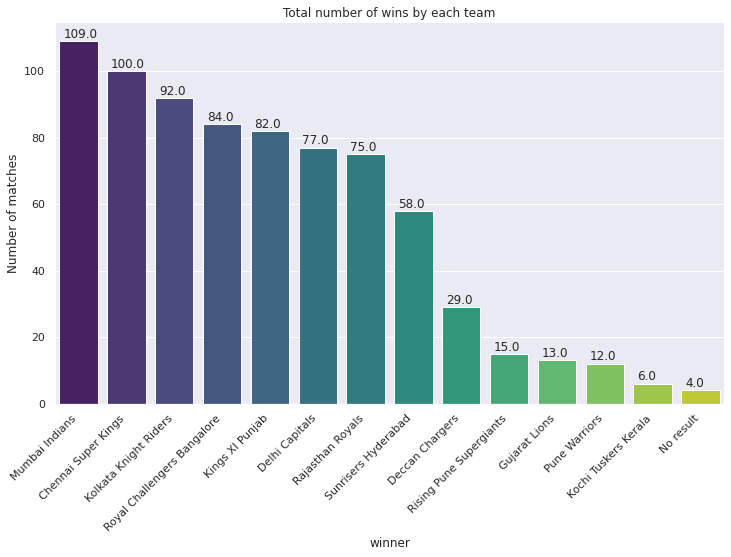

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
def annot_plot(ax,w,h):# function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
plt.figure(figsize=(12,7))
ax = sns.countplot("winner", data = df_matches, order = df_matches['winner'].value_counts().index,palette='viridis')
plt.title("Total number of wins by each team")
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Number of matches')
annot_plot(ax,0.08,1)
plt.show()

In [16]:
# Lets check winning ratio between DC VS KXIP
df_DC_KXIP = df_matches[((df_matches['team1'] == 'Kings XI Punjab') | (df_matches['team1'] == 'Delhi Capitals')) & 
                         ((df_matches['team2'] == 'Kings XI Punjab') | (df_matches['team2'] == 'Delhi Capitals'))] 

#plotting DC and KXIP wins against each other
import plotly.graph_objs as go
df_winner = df_DC_KXIP[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by KXIP and DC against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

In total matches DC won 77 matches and KXIP won 82 matches. When it comes to haed-head DC won 10 matches and KXIP won 14 matches.

Lets look at indivdual player records as well from both teams.

In [19]:
#Lets look at how many player of the match awards won by current DC and KXIP players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_DC = df_matches[(df_matches['player_of_match'] == 'P Shaw') | (df_matches['player_of_match'] == 'S Dhawan') |
                                (df_matches['player_of_match'] == 'SS Iyer') | (df_matches['player_of_match'] == 'RR Pant') |
                                (df_matches['player_of_match'] == 'R Ashwin') | (df_matches['player_of_match'] == 'K Rabada') |
                                (df_matches['player_of_match'] == 'AR Patel') | (df_matches['player_of_match'] == 'H Patel')]

print("Total number of man of matches won by Delhi players is", df_man_of_match_DC.shape[0])

df_man_of_match_KXIP = df_matches[(df_matches['player_of_match'] == 'KL Rahul') | (df_matches['player_of_match'] == 'MA Agarwal') |
                                (df_matches['player_of_match'] == 'GJ Maxwell') | (df_matches['player_of_match'] == 'CH Gayle') |
                                (df_matches['player_of_match'] == 'Mohammed Shami') | (df_matches['player_of_match'] == 'Mandeep Singh') |
                                (df_matches['player_of_match'] == 'CJ Jordan') | (df_matches['player_of_match'] == 'M Ashwin') ]

print("Total number of man of matches won by Punjab players is", df_man_of_match_KXIP.shape[0])                                

Total number of man of matches won by Delhi players is 24
Total number of man of matches won by Punjab players is 36


**Conclusion :-**

According to above two analysis Punjab won more matches against delhi at the same time punjab players won more man of the match awards. So i am predicting KXIP will win today match.

### Q2) What will KL Rahul Strike rate in the first 6 overs?

In [22]:
#Lets filter out KL rahul and powerplay overs
df_Rahul_PP = df_deliveries[(df_deliveries['batsman'] == "KL Rahul") & (df_deliveries['over'] <= 6)]
df_Rahul_PP.head(2)
#Number of runs scored by Rahul in first 6 overs
total_runs = df_Rahul_PP['batsman_runs'].sum()
#Number of balls faced by Rahul in first 6 overs
#Here wide balls are not counted under batsman faced balls. We can count No-balls under batsman faced deliveries
no_of_balls = len(df_Rahul_PP['ball']) - len(df_Rahul_PP[df_Rahul_PP['wide_runs'] >= 1])

print("KL Rahul Scored",total_runs, "runs in Powerplay in",no_of_balls,"balls")

Strike_rate = (total_runs/no_of_balls)*100
print("KL Rahul Strike rate in powerplay is",int(Strike_rate))

KL Rahul Scored 844 runs in Powerplay in 609 balls
KL Rahul Strike rate in powerplay is 138


In [25]:
#Lets calculate Rahul strike rate against current DC bowlers. Anrich,Tushar deshpandey are playing their first ipl season.
df_Rahul_against_DC = df_deliveries[(df_deliveries['batsman'] == 'KL Rahul') & (df_deliveries['over'] <= 6) &
                         ((df_deliveries['bowler'] == 'K Rabada') | (df_deliveries['bowler'] == 'R Ashwin') |
                         (df_deliveries['bowler'] == 'AR Patel')  | (df_deliveries['bowler'] == 'MP Stoinis'))]                                           

#Number of runs scored by Rahul against current DC bowlers
total_runs = df_Rahul_against_DC['batsman_runs'].sum()
#Number of balls faced by Rahul against current DC bowlers
#Here wide balls are not counted under batsman faced balls. We can count No-balls under batsman faced deliveries
no_of_balls = len(df_Rahul_against_DC['ball']) - len(df_Rahul_against_DC[df_Rahul_against_DC['wide_runs'] >= 1])

print("KL Rahul Scored",total_runs, "runs aginst current DC bowlers in",no_of_balls,"balls in powerplay\n")

Strike_rate = (total_runs/no_of_balls)*100
print("KL Rahul Strike rate in powerplay against current DC bowlers is",int(Strike_rate))


KL Rahul Scored 32 runs aginst current DC bowlers in 17 balls in powerplay

KL Rahul Strike rate in powerplay against current DC bowlers is 188


**Conclusion :-**

His strike rate in powerplay in ipl is 138 but his strike rate against current DC players in powerplay is 188. So i am predicting his strike rate will be more than 138.

### Q3) What will be Shreyas Iyer Contribution to DC total Score?

In [50]:
#Lets filter out shreyas iyer
#I know shreyas Iyer is playing from 2014 onwards for Delhi only
#Lets claculate the number of runs score by DC and shreyas from 2014 onwards.
#In some matches player will goes for Diamond duck(with out facing deliveries) i.e 0(0). i.why i am choosing non-striker option also
df_shreyas = df_deliveries[(df_deliveries["batsman"] == 'SS Iyer')]  
common = df_deliveries.merge(df_shreyas,on=['match_id','match_id'])

df_DC = df_deliveries[(df_deliveries.match_id.isin(common.match_id))&(df_deliveries.match_id.isin(common.match_id))]
df_DC = df_DC[df_DC['batting_team'] == 'Delhi Capitals']    

shreyas_runs = df_shreyas['batsman_runs'].sum()
DC_runs = df_DC['total_runs'].sum()
print("Total runs scored by Shreyas Iyer is in IPL",shreyas_runs,"runs\n")
print("Total Runs scored by Delhi Capitals when Shreyas was in  Delhi Capitals playing11 is",DC_runs,"runs")




Total runs scored by Shreyas Iyer is in IPL 1714 runs

Total Runs scored by Delhi Capitals when Shreyas was in  Delhi Capitals playing11 is 9916 runs


In [51]:
#Lets calculate percentage of runs he scored
Per_runs = (shreyas_runs*100)/(DC_runs)
print(round(Per_runs,2),"% was the total contribution by shreyas Iyer to DC total score when he was in playing11" )

17.29 % was the total contribution by shreyas Iyer to DC total score when he was in playing11


**Conclusion :-**

His average contribution in total runs is 17.29%. Now he is a captain and he is more responsible so i am predicting his contribution in today match is 18.1% or more almost equal to our analysis.

### Q4) How many wickets will be taken by KXIP bowlers excluding that taken by Mohammad Shami, from the 31st ball to 120th ball?

We dont have enough data about current KXIP bowler i.e Arshadeep, Bishnoi, Murugan Ashwin. So lets take KXIP wickets in IPL.

In [59]:
#First calculating number of wickets taken by KXIP from 6th over to 20th over.
df_wickets = df_deliveries[(df_deliveries['bowling_team'] == 'Kings XI Punjab') &(df_deliveries['over'] >= 6)]
                            
#Then calculate number of wickets taken by Shami in ipl from 6th over to 20th over.
df_shami = df_deliveries[(df_deliveries['bowler'] == 'Mohammed Shami') & (df_deliveries['dismissal_kind'] != 'run out') & 
                         (df_deliveries['dismissal_kind'] != 'retired hurt') & (df_deliveries['over'] >= 6) &
                         (df_deliveries['player_dismissed'] != 'No wicket')]

KXIP_wickets = len(df_wickets[df_wickets['player_dismissed'] != 'No Wicket'])
Shami_wickets = len(df_shami[df_shami['player_dismissed'] != 'No Wicket'])
KXIP_matches = df_wickets['match_id'].nunique()
Shami_matches = df_shami['match_id'].nunique()
print("KXIP taken",KXIP_wickets,"wickets from 6th over to 20th over in",KXIP_matches,"matches")
print("Shami taken",Shami_wickets,"wickets from 6th over to 20th over in",Shami_matches,"matches")


KXIP taken 792 wickets from 6th over to 20th over in 175 matches
Shami taken 34 wickets from 6th over to 20th over in 46 matches


In [62]:
avg_wickets_kxip = KXIP_wickets/KXIP_matches
print("average number of wickets taken by KXIP from 6th over to 20th over is",int(avg_wickets_kxip))

average number of wickets taken by KXIP from 6th over to 20th over is 4


**Conclusion :-**

KXIP has taken 4 wickets per match from 31st ball to 120th ball. Shami also almost taken 1 wicket per match from 6th over to 20th over. 

So according to above analysis KXIP will take 2-3 wickets from 31st ball to 120th ball excluding shami wickets.

### Q5) What will be the status of chris gayle batting during KXIP innings?

In [67]:
#Lets calculate Gayle strike rate against current DC bowlers. 
df_Gayle_against_DC = df_deliveries[(df_deliveries['batsman'] == 'CH Gayle') &
                         ((df_deliveries['bowler'] == 'K Rabada') | (df_deliveries['bowler'] == 'R Ashwin') |
                         (df_deliveries['bowler'] == 'AR Patel')  | (df_deliveries['bowler'] == 'MP Stoinis'))]                                           

#Number of runs scored by Gayle against current DC bowlers
total_runs = df_Gayle_against_DC['batsman_runs'].sum()
#Number of balls faced by Gayle against current DC bowlers
#Here wide balls are not counted under batsman faced balls. We can count No-balls under batsman faced deliveries
no_of_balls = len(df_Gayle_against_DC['ball']) - len(df_Gayle_against_DC[df_Gayle_against_DC['wide_runs'] >= 1])

print("Chris Gayle Scored",total_runs, "runs aginst current DC bowlers in",no_of_balls,"balls\n")

Strike_rate = (total_runs/no_of_balls)*100
print("Chris Gayle Strike rate against current DC bowlers is",int(Strike_rate))

Chris Gayle Scored 111 runs aginst current DC bowlers in 88 balls

Chris Gayle Strike rate against current DC bowlers is 126


In [71]:
#Lets filter out Chris Gayle
df_Gayle = df_deliveries[(df_deliveries['batsman'] == "CH Gayle") ]

#Number of runs scored by Gayle in first 6 overs
total_runs = df_Gayle['batsman_runs'].sum()
#Number of balls faced by Gayle in first 6 overs
#Here wide balls are not counted under batsman faced balls. We can count No-balls under batsman faced deliveries
no_of_balls = len(df_Gayle['ball']) - len(df_Gayle[df_Gayle['wide_runs'] >= 1])

print("Chris Gayle Scored",total_runs, "runs in IPL in",no_of_balls,"balls\n")

Strike_rate = (total_runs/no_of_balls)*100
print("Chris Gayle Strike rate in IPL is",int(Strike_rate))

Chris Gayle Scored 4560 runs in IPL in 2981 balls

Chris Gayle Strike rate in IPL is 152


In [72]:
df_Gayle_wicket = df_deliveries[(df_deliveries['batsman'] == "CH Gayle") | (df_deliveries['non_striker'] == "CH Gayle")]

out = len(df_Gayle_wicket[df_Gayle_wicket['player_dismissed'] == "CH Gayle"])
no_of_matches = df_Gayle_wicket['match_id'].nunique()

print(out,"times Gayle got out in",no_of_matches,"matches")

109 times Gayle got out in 124 matches


**Conclusion :-**

Even though his strike rate against Current DC players is 126 but his overall strike rate in ipl is 152. Also he almost got out in 90% of the matches.

So according to above analysis i am predicting his strike rate will be greater than 130 and he will get out because he is a top order batsman.